# Generate visualizations for Data Generation

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# Reading the content of the log files for each representation
features_log_path = 'Data/features_log'
raw_log_path = 'Data/raw_log'
tiles_log_path = 'Data/tiles_log'

with open(features_log_path, 'r') as file:
    features_log_content = file.readlines()

with open(raw_log_path, 'r') as file:
    raw_log_content = file.readlines()

with open(tiles_log_path, 'r') as file:
    tiles_log_content = file.readlines()

# Displaying the first few lines of each log for an overview
log_overview = {
    "Features": features_log_content[:10],
    "Raw": raw_log_content[:10],
    "Tiles": tiles_log_content[:10]
}

In [ ]:
# Function to extract specific metric data from the log content
def extract_values_v4(log_content):
    mean_reward = []
    mean_loss = []
    mean_qvalue = []

    for line in log_content[1:]:  # Skipping the header
        split_line = line.split()
        if len(split_line) > 7:
            mean_reward.append(float(split_line[3]))
            mean_loss.append(float(split_line[5]))
            mean_qvalue.append(float(split_line[6]))

    return mean_reward, mean_loss, mean_qvalue

# Extracting metric values for each representation using the updated method
features_mean_reward, features_mean_loss, features_mean_qvalue = extract_values_v4(features_log_content)
raw_mean_reward, raw_mean_loss, raw_mean_qvalue = extract_values_v4(raw_log_content)
tiles_mean_reward, tiles_mean_loss, tiles_mean_qvalue = extract_values_v4(tiles_log_content)

In [ ]:
# Updating the data for plotting
data_to_plot_v4 = {
    "MeanReward": {
        "Features": features_mean_reward,
        "Raw": raw_mean_reward,
        "Tiles": tiles_mean_reward
    },
    "MeanLoss": {
        "Features": features_mean_loss,
        "Raw": raw_mean_loss,
        "Tiles": tiles_mean_loss
    },
    "MeanQValue": {
        "Features": features_mean_qvalue,
        "Raw": raw_mean_qvalue,
        "Tiles": tiles_mean_qvalue
    }
}

len(data_to_plot_v4["MeanReward"]["Features"]), len(data_to_plot_v4["MeanLoss"]["Features"]), len(data_to_plot_v4["MeanQValue"]["Features"])

(410, 410, 410)

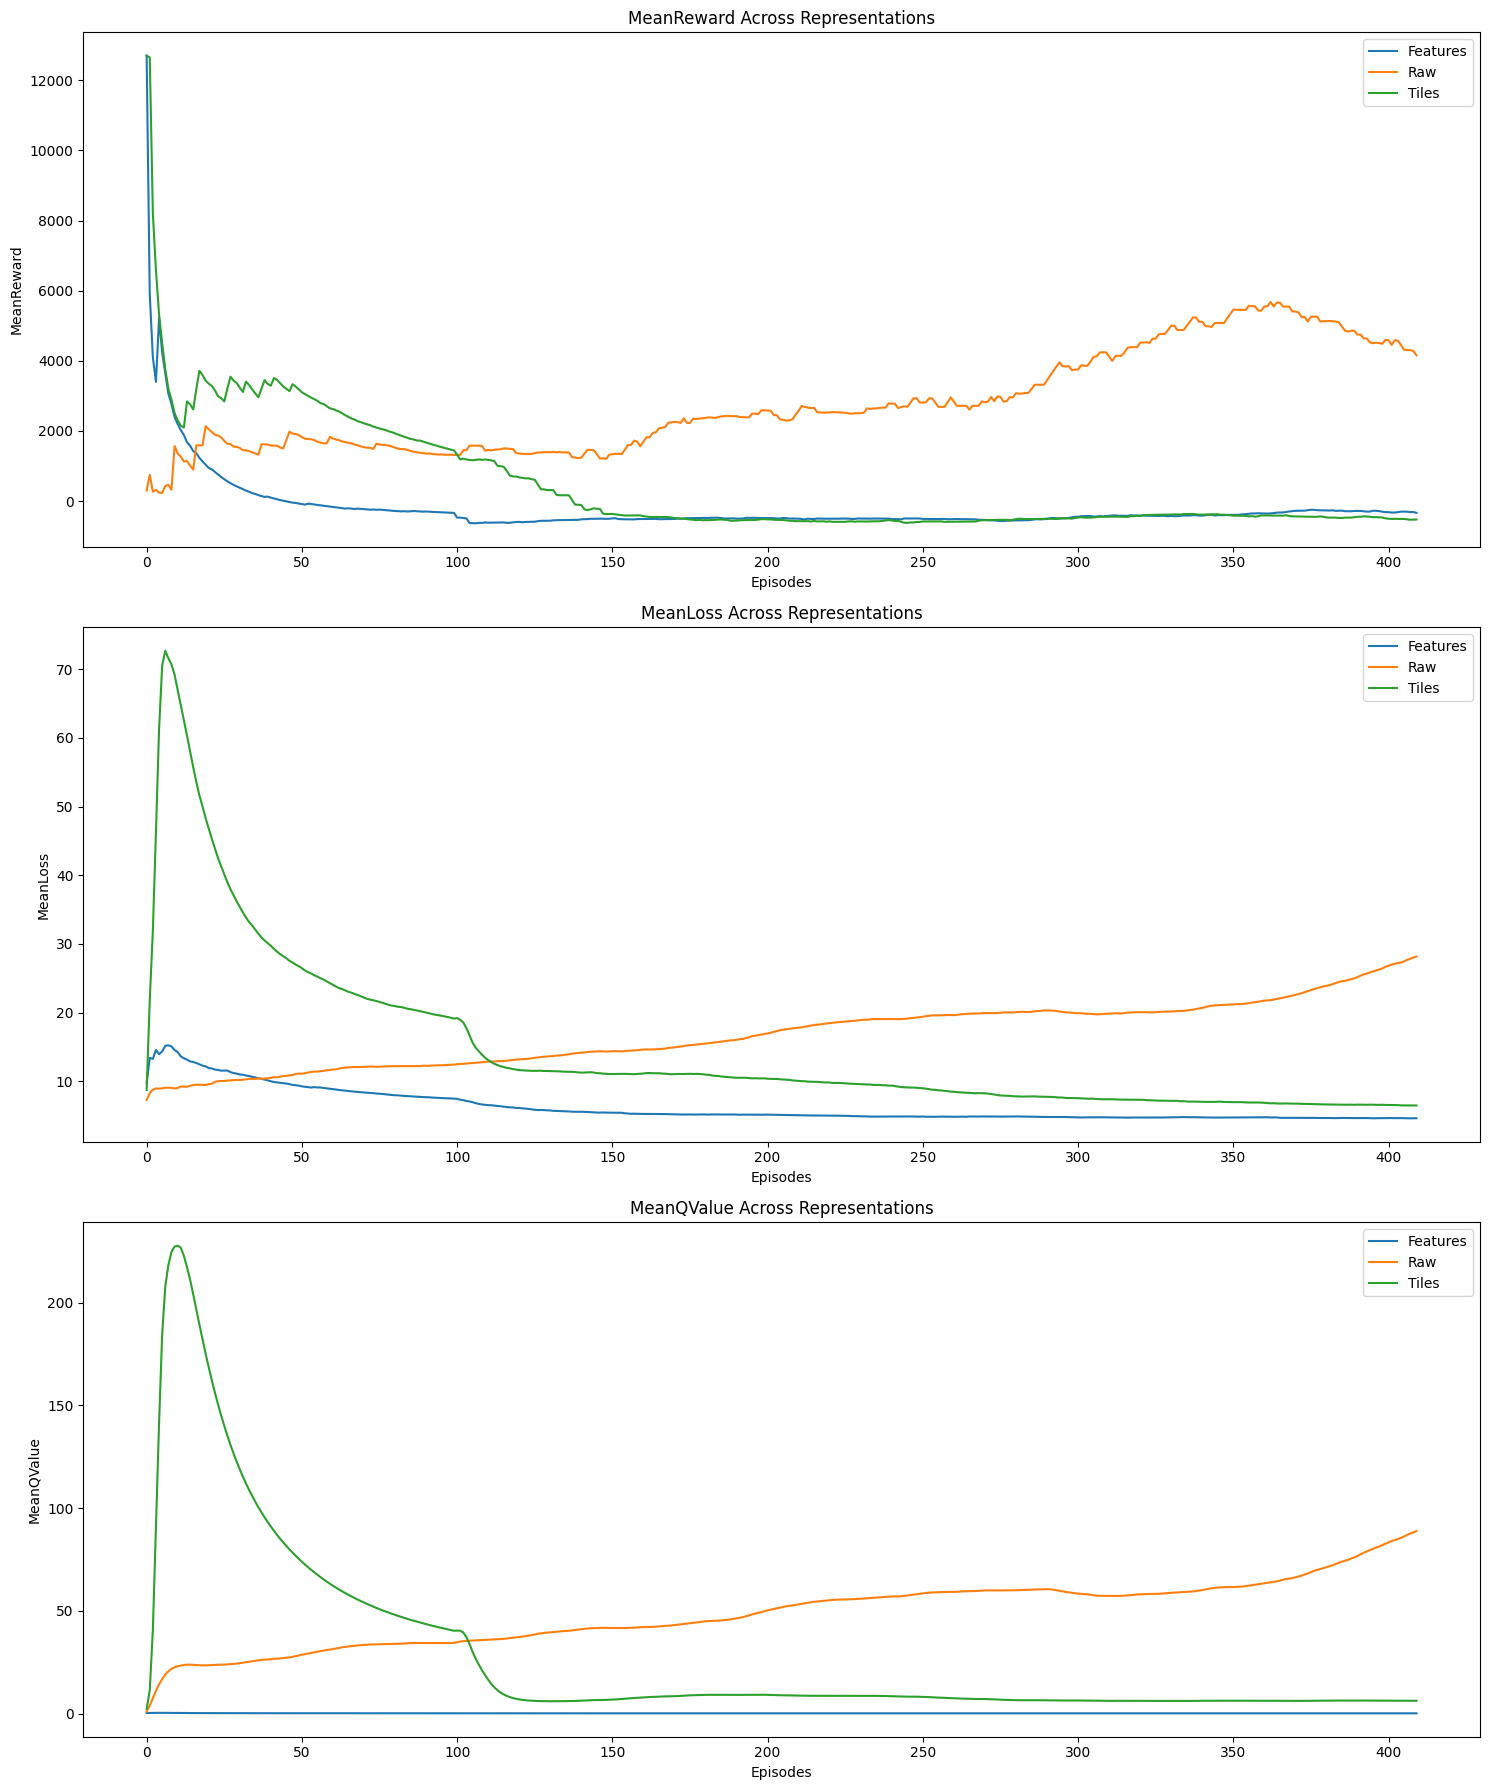

In [ ]:
# Plotting the metrics for comparison across representations
fig, axarr = plt.subplots(3, 1, figsize=(15, 18))

# Plotting MeanReward
for rep, values in data_to_plot_v4["MeanReward"].items():
    axarr[0].plot(values, label=rep)
axarr[0].set_title('MeanReward Across Representations')
axarr[0].set_xlabel('Episodes')
axarr[0].set_ylabel('MeanReward')
axarr[0].legend()

# Plotting MeanLoss
for rep, values in data_to_plot_v4["MeanLoss"].items():
    axarr[1].plot(values, label=rep)
axarr[1].set_title('MeanLoss Across Representations')
axarr[1].set_xlabel('Episodes')
axarr[1].set_ylabel('MeanLoss')
axarr[1].legend()

# Plotting MeanQValue
for rep, values in data_to_plot_v4["MeanQValue"].items():
    axarr[2].plot(values, label=rep)
axarr[2].set_title('MeanQValue Across Representations')
axarr[2].set_xlabel('Episodes')
axarr[2].set_ylabel('MeanQValue')
axarr[2].legend()

plt.tight_layout()
plt.show()

### Generate Correlation Matrix

In [ ]:
import pandas as pd
import seaborn as sns

# Creating dataframes for each representation
features_df = pd.DataFrame({
    'MeanReward': data_to_plot_v4['MeanReward']['Features'],
    'MeanLoss': data_to_plot_v4['MeanLoss']['Features'],
    'MeanQValue': data_to_plot_v4['MeanQValue']['Features']
})

raw_df = pd.DataFrame({
    'MeanReward': data_to_plot_v4['MeanReward']['Raw'],
    'MeanLoss': data_to_plot_v4['MeanLoss']['Raw'],
    'MeanQValue': data_to_plot_v4['MeanQValue']['Raw']
})

tiles_df = pd.DataFrame({
    'MeanReward': data_to_plot_v4['MeanReward']['Tiles'],
    'MeanLoss': data_to_plot_v4['MeanLoss']['Tiles'],
    'MeanQValue': data_to_plot_v4['MeanQValue']['Tiles']
})

# Computing correlation matrices for each representation
features_corr = features_df.corr()
raw_corr = raw_df.corr()
tiles_corr = tiles_df.corr()

features_corr, raw_corr, tiles_corr

(            MeanReward  MeanLoss  MeanQValue
 MeanReward    1.000000  0.635749    0.797678
 MeanLoss      0.635749  1.000000    0.931968
 MeanQValue    0.797678  0.931968    1.000000,
             MeanReward  MeanLoss  MeanQValue
 MeanReward    1.000000  0.871375    0.838221
 MeanLoss      0.871375  1.000000    0.993422
 MeanQValue    0.838221  0.993422    1.000000,
             MeanReward  MeanLoss  MeanQValue
 MeanReward    1.000000  0.719512    0.673981
 MeanLoss      0.719512  1.000000    0.979854
 MeanQValue    0.673981  0.979854    1.000000)

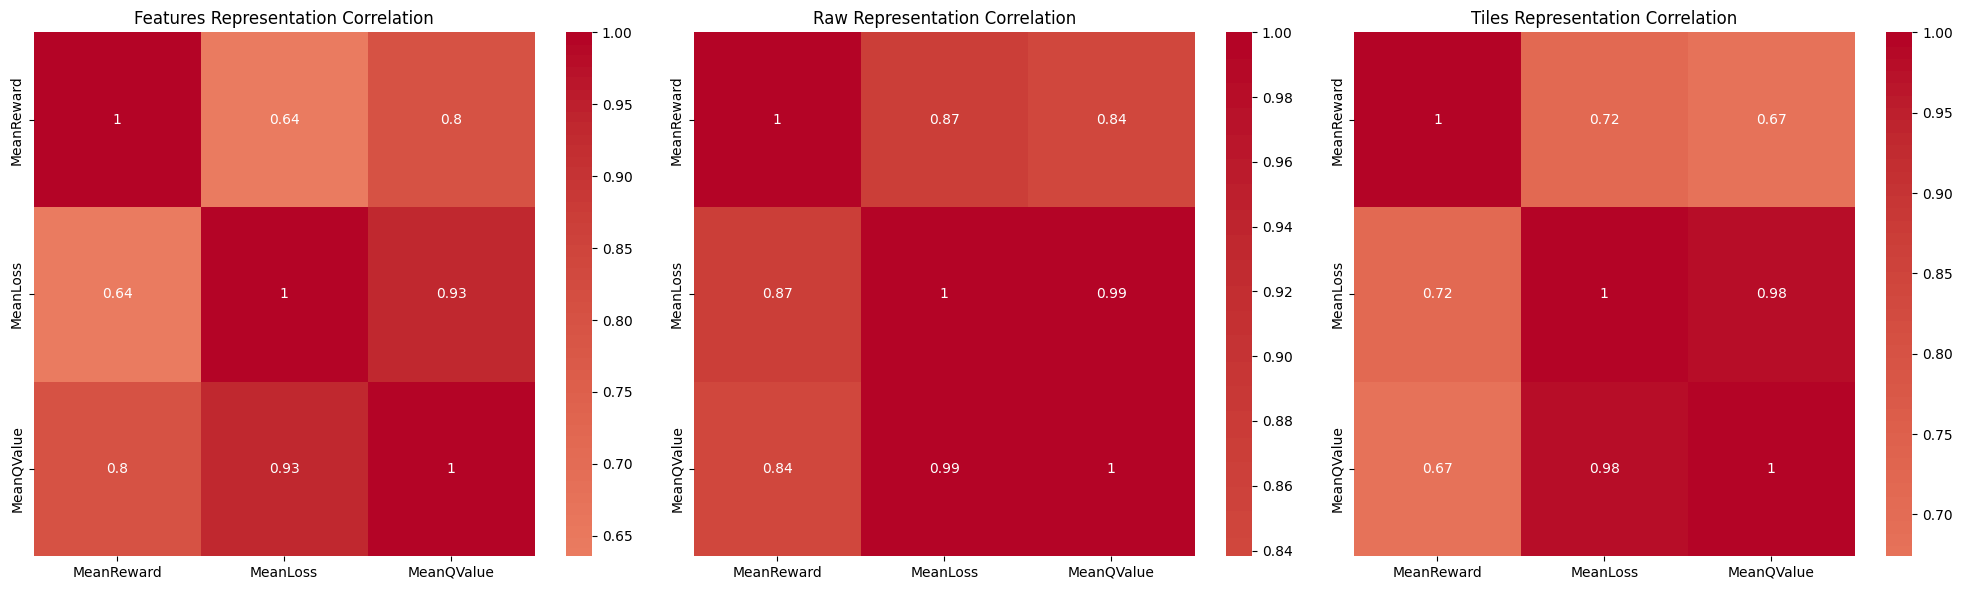

In [ ]:
# Visualizing the correlation matrices using heatmaps
fig, axarr = plt.subplots(1, 3, figsize=(20, 6))

# Features Representation Heatmap
sns.heatmap(features_corr, annot=True, cmap='coolwarm', center=0, ax=axarr[0])
axarr[0].set_title('Features Representation Correlation')

# Raw Representation Heatmap
sns.heatmap(raw_corr, annot=True, cmap='coolwarm', center=0, ax=axarr[1])
axarr[1].set_title('Raw Representation Correlation')

# Tiles Representation Heatmap
sns.heatmap(tiles_corr, annot=True, cmap='coolwarm', center=0, ax=axarr[2])
axarr[2].set_title('Tiles Representation Correlation')

plt.tight_layout()
plt.show()

In [ ]:
# Function to compute rate of change for a list of values
def compute_rate_of_change(values):
    return [values[i+1] - values[i] for i in range(len(values)-1)]

In [ ]:
roc_data_v3 = {
    "MeanReward": {
        "Features": compute_rate_of_change(features_mean_reward),
        "Raw": compute_rate_of_change(raw_mean_reward),
        "Tiles": compute_rate_of_change(tiles_mean_reward)
    },
    "MeanLoss": {
        "Features": compute_rate_of_change(features_mean_loss),
        "Raw": compute_rate_of_change(raw_mean_loss),
        "Tiles": compute_rate_of_change(tiles_mean_loss)
    },
    "MeanQValue": {
        "Features": compute_rate_of_change(features_mean_qvalue),
        "Raw": compute_rate_of_change(raw_mean_qvalue),
        "Tiles": compute_rate_of_change(tiles_mean_qvalue)
    }
}


### Generate Rate of Change

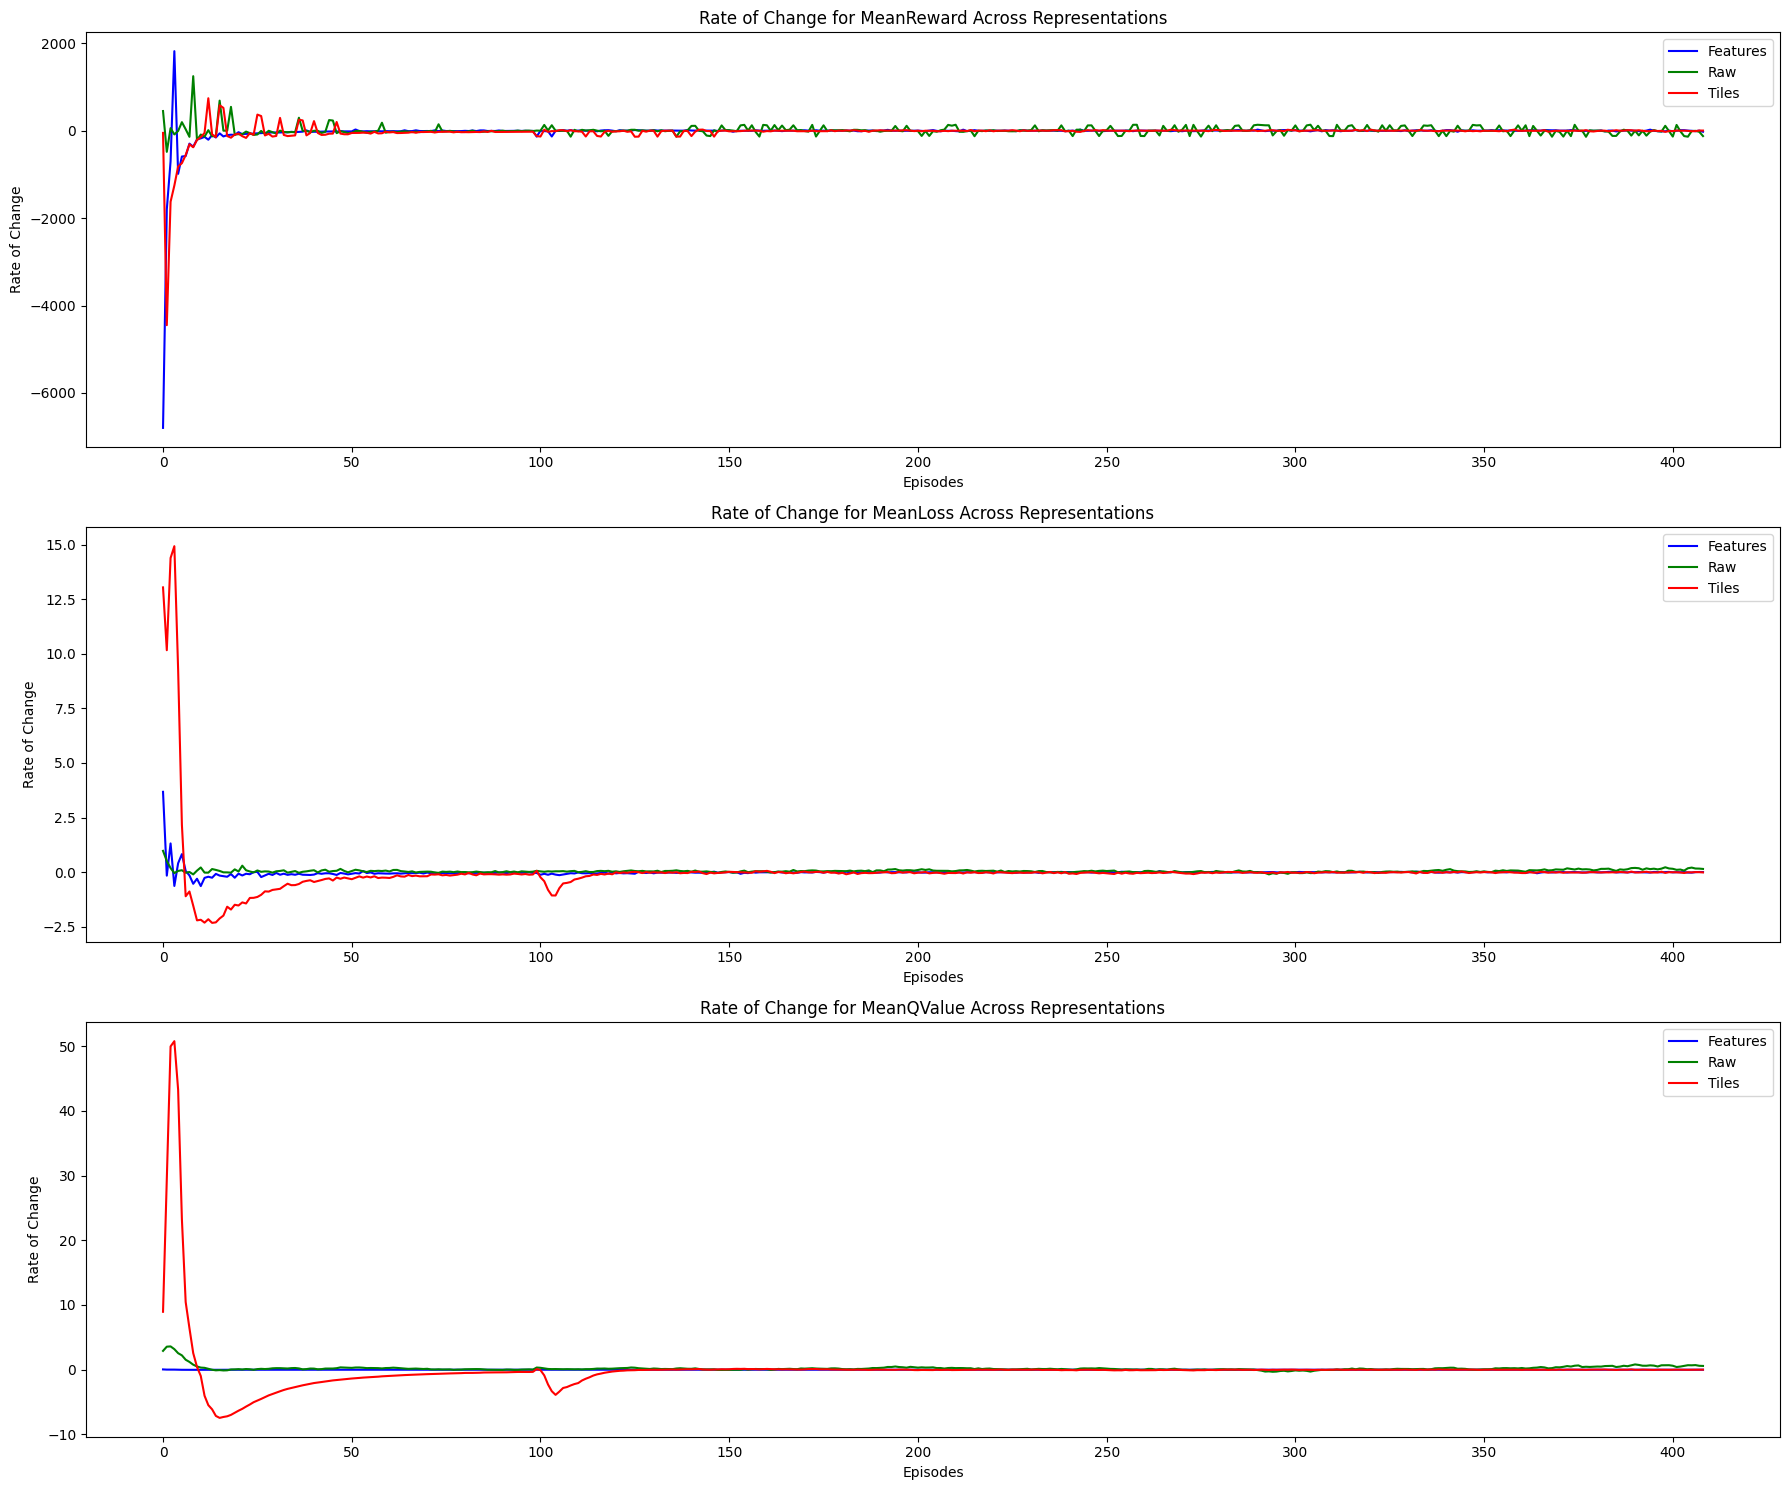

In [ ]:
plt.figure(figsize=(18, 15))

# Rate of Change for MeanReward
plt.subplot(3, 1, 1)
plt.plot(roc_data_v3["MeanReward"]["Features"], label="Features", color='b')
plt.plot(roc_data_v3["MeanReward"]["Raw"], label="Raw", color='g')
plt.plot(roc_data_v3["MeanReward"]["Tiles"], label="Tiles", color='r')
plt.title("Rate of Change for MeanReward Across Representations")
plt.xlabel("Episodes")
plt.ylabel("Rate of Change")
plt.legend()

# Rate of Change for MeanLoss
plt.subplot(3, 1, 2)
plt.plot(roc_data_v3["MeanLoss"]["Features"], label="Features", color='b')
plt.plot(roc_data_v3["MeanLoss"]["Raw"], label="Raw", color='g')
plt.plot(roc_data_v3["MeanLoss"]["Tiles"], label="Tiles", color='r')
plt.title("Rate of Change for MeanLoss Across Representations")
plt.xlabel("Episodes")
plt.ylabel("Rate of Change")
plt.legend()

# Rate of Change for MeanQValue
plt.subplot(3, 1, 3)
plt.plot(roc_data_v3["MeanQValue"]["Features"], label="Features", color='b')
plt.plot(roc_data_v3["MeanQValue"]["Raw"], label="Raw", color='g')
plt.plot(roc_data_v3["MeanQValue"]["Tiles"], label="Tiles", color='r')
plt.title("Rate of Change for MeanQValue Across Representations")
plt.xlabel("Episodes")
plt.ylabel("Rate of Change")
plt.legend()

plt.tight_layout()
plt.show()